# Student Performance Indicatior
Life Cycle of the Project
* Understanding Problem Statement
* Data Collection 
* Data Checks to perform
* Exploratory Data Analysis
* Data Pre-processing
* Model Training
* Choose Best Model

# 1) Problem Statment
* The project understands how the student's performance (test score) is affected by variables such as Gender, Ethnicity, Parental level of Education, and Test preparation Course.

# 2) Data Collection 
* From Kaggle with 1000 rows and 8 features

In [5]:
# Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r"C:\Users\Gyegn\OneDrive\Desktop\ML_project\notebook\data\StudentsPerformance.csv")

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [19]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [20]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [21]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [23]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [29]:
df.groupby(['race/ethnicity','gender','test preparation course']).size().unstack()

test preparation course  completed  none
race/ethnicity gender                   
group A        female           12    24
               male             19    34
group B        female           35    69
               male             33    53
group C        female           69   111
               male             48    91
group D        female           44    85
               male             38    95
group E        female           24    45
               male             36    35

In [31]:
df.isna().sum().sum()

0

In [36]:
df.duplicated().sum()

0

In [37]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [51]:
min_math_score_male = df[df['gender']=='male']['math score'].min()
df[(df['gender']=='male') & (df['math score']==min_math_score_male)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
91,male,group C,high school,free/reduced,none,27,34,36


In [55]:
# Counting the numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O'] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'The numerical features are : {numerical_features} and')
print(f'The categorical_features are: {categorical_features}')

The numerical features are : ['math score', 'reading score', 'writing score'] and
The categorical_features are: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [73]:
df['total_score'] = df['math score']+df['reading score']+df["writing score"]
df['average_score'] = df['total_score']/3
df['average_score'] = df['average_score'].round(2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [81]:
reading_full = df[df['reading score']==100]['reading score'].count()
writing_full = df[df['writing score']==100]['writing score'].count()
math_full = df[df['math score']==100]['math score'].count()

print(f'The number of students with full marks in math: {math_full} ')
print(f'The number of students with full marks in writing: {writing_full} ')
print(f'The number of students with full marks in reading: {reading_full} ')

The number of students with full marks in math: 7 
The number of students with full marks in writing: 14 
The number of students with full marks in reading: 17 


In [84]:
reading_less_20 = df[df['reading score'] < 20]['reading score'].count()
writing_less_20 = df[df['writing score'] < 20]['writing score'].count()
math_less_20 = df[df['math score'] < 20]['math score'].count()

print(f'The number of students with less than 20 in reading: {reading_less_20}')
print(f'The number of students with less than 20 in writing: {writing_less_20}')
print(f'The number of students with less than 20 in math: {math_less_20}')

The number of students with less than 20 in reading: 1
The number of students with less than 20 in writing: 3
The number of students with less than 20 in math: 4


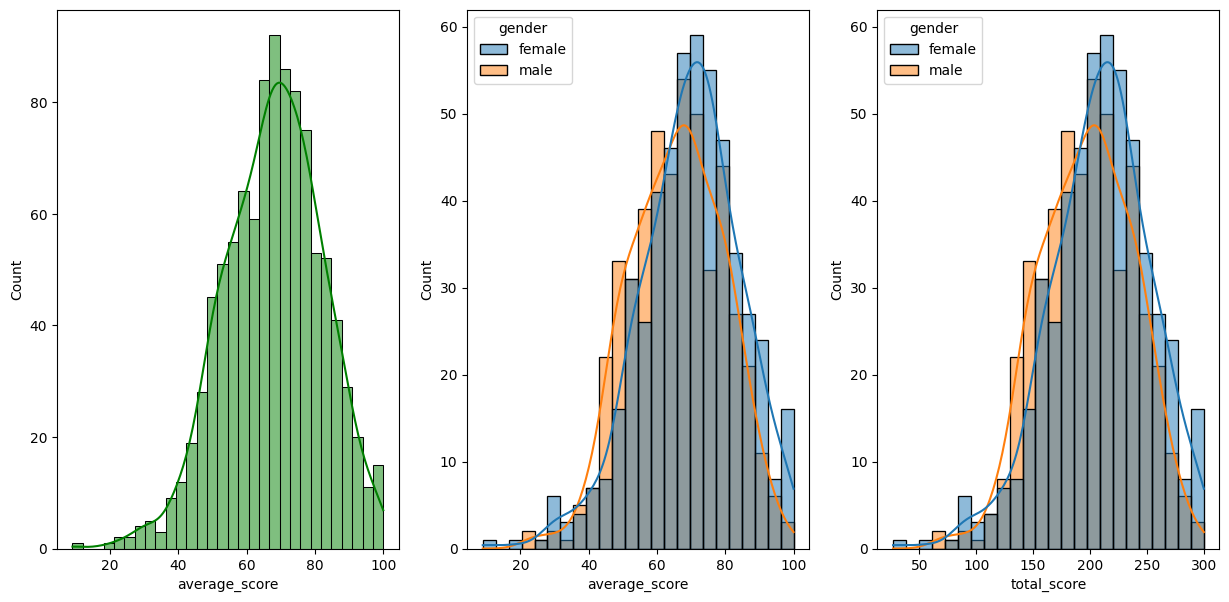

In [99]:
fig, axs = plt.subplots(1,3,figsize = (15,7))
plt.subplot(131)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df,x='average_score',hue='gender',kde=True,color='g',multiple='layer')
plt.subplot(133)
sns.histplot(data=df,x='total_score',hue='gender',kde=True,color='g',multiple='layer')

plt.show()

In [108]:
max_scorrers = df[df['total_score']==df['total_score'].max()]
max_scorrers['gender'].value_counts()

gender
female    2
male      1
Name: count, dtype: int64

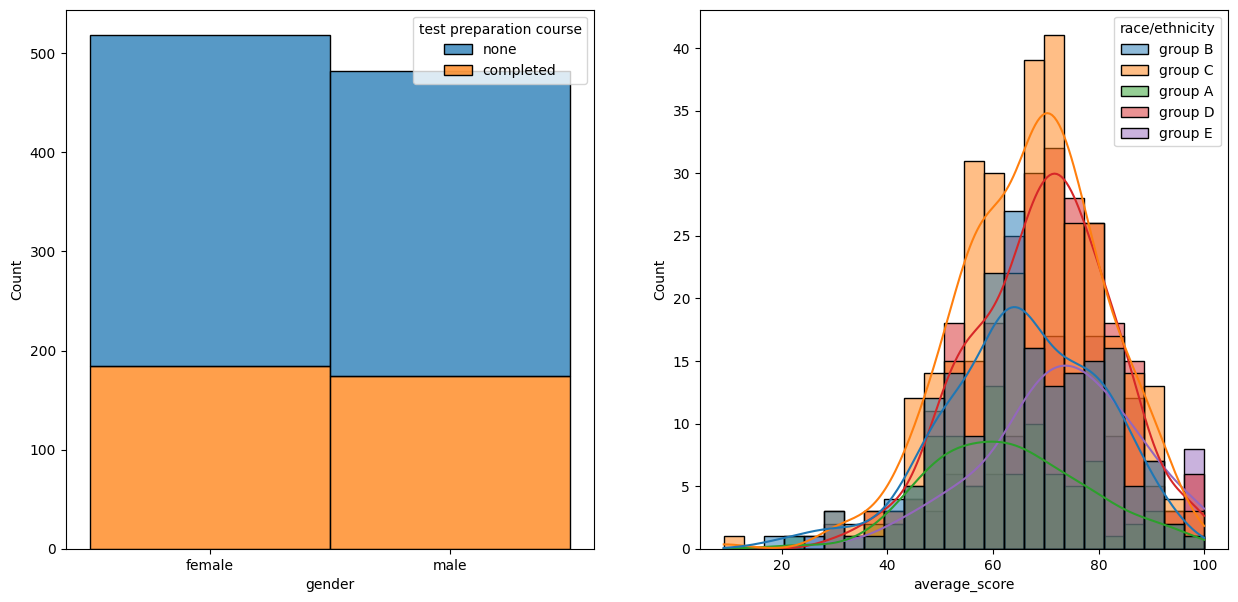

In [113]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='gender',hue='test preparation course',multiple='stack')
plt.subplot(122)
sns.histplot(data=df,x='average_score',hue='race/ethnicity',kde=True,multiple='layer')

plt.show()